# Raw analytics - Social media User Analysis

análise dos dados brutos da camada bronze

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregamento

In [3]:
df_raw = pd.read_csv('dados_brutos.csv')

# Verificações de inconsistências nos dados.

## Verificação de linhas duplicada
Foi aplicada a função duplicade().sum() para que se ouver alguma linha duplicada ela seja somada e se caso não ouver duplicadas retornar uma mensagem confirmando a informação.

In [4]:
duplicada = df_raw.duplicated().sum()
if duplicada > 0:
    print(f'Existem {duplicada} linhas duplicadas. ')
else:
    print('Não existem linhas duplicadas. ')

Não existem linhas duplicadas. 


## Verificação de valores escritos de formas diferentes nas colunas de texto

In [5]:
df_strings = df_raw.select_dtypes(include=['object', 'string'])

for coluna in df_strings.columns:
    print(f'A coluna {coluna} possui os valores unicos:')
    print(df_raw[coluna].unique())
    print("-----")


A coluna app_name possui os valores unicos:
['Instagram']
-----
A coluna gender possui os valores unicos:
['Female' 'Non-binary' 'Male' 'Prefer not to say']
-----
A coluna country possui os valores unicos:
['India' 'United Kingdom' 'Canada' 'South Korea' 'United States' 'Japan'
 'Australia' 'Brazil' 'Other' 'Germany']
-----
A coluna urban_rural possui os valores unicos:
['Rural' 'Urban' 'Suburban']
-----
A coluna income_level possui os valores unicos:
['High' 'Middle' 'Upper-middle' 'Lower-middle' 'Low']
-----
A coluna employment_status possui os valores unicos:
['Retired' 'Full-time employed' 'Student' 'Unemployed' 'Freelancer'
 'Part-time']
-----
A coluna education_level possui os valores unicos:
['Bachelor’s' 'Other' 'Master’s' 'High school' 'Some college' 'PhD']
-----
A coluna relationship_status possui os valores unicos:
['Single' 'Divorced' 'In a relationship' 'Married' 'Widowed']
-----
A coluna has_children possui os valores unicos:
['No' 'Yes']
-----
A coluna diet_quality possu

## Dados faltando ou vazios 

In [6]:
missing_values = pd.DataFrame({
    'coluna': df_raw.columns,
    'nulos': df_raw.isnull().sum(),
    'vazios': (df_raw == '').sum(),
    'total': df_raw.isnull().sum() + (df_raw == '').sum(),
    'percentual': (df_raw.isnull().sum() + (df_raw == '').sum()) / len(df_raw) * 100
})
if not missing_values.empty:
    print("Não foram encontrados valores ausentes.")
else:
    missing_values = missing_values.sort_values(by='percentual', ascending=False)
    missing_values

Não foram encontrados valores ausentes.


## Verificação de outliers

Para a decteção e visualização de possiveis outliers foram usandos graficos boxplot e um algoritmo de dectação logo abaixo utilizando-se da tecnica IQR 

In [9]:
outliers = {}

for coluna in df_raw.select_dtypes(include=["float64","int64"]).columns:
    Q1 = df_raw[coluna].quantile(0.25)
    Q3 = df_raw[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers_coluna = df_raw[(df_raw[coluna] < limite_inferior) | (df_raw[coluna] > limite_superior)]
    total_out = len(outliers_coluna)

    if total_out > 0:
        menor_valor = outliers_coluna[coluna].min()
        maior_valor = outliers_coluna[coluna].max()
    else:
        menor_valor = None
        maior_valor = None

    outliers[coluna] ={
        "contagem de outliers": total_out,
        "% de outliers": (total_out / len(df_raw)) * 100,
        "menor valor": menor_valor,
        "maior valor": maior_valor,
    }

outliers_df = pd.DataFrame.from_dict(outliers, orient='index')
outliers_df.head(38)



,contagem de outliers,% de outliers,menor valor,maior valor
user_id,0,0.000000,NaN,NaN
age,0,0.000000,NaN,NaN
exercise_hours_per_week,10387,0.671040,18.30,24.10
sleep_hours_per_night,14835,0.958398,3.00,10.00
perceived_stress_score,0,0.000000,NaN,NaN
self_reported_happiness,0,0.000000,NaN,NaN
body_mass_index,5071,0.327606,35.90,45.00
blood_pressure_systolic,0,0.000000,NaN,NaN
blood_pressure_diastolic,0,0.000000,NaN,NaN
daily_steps_count,11066,0.714906,7566.00,8473.00


Ao analisar os resultados do algoritmo foi projetado um boxplot de algumas colunas para ter uma visulização dos outliers

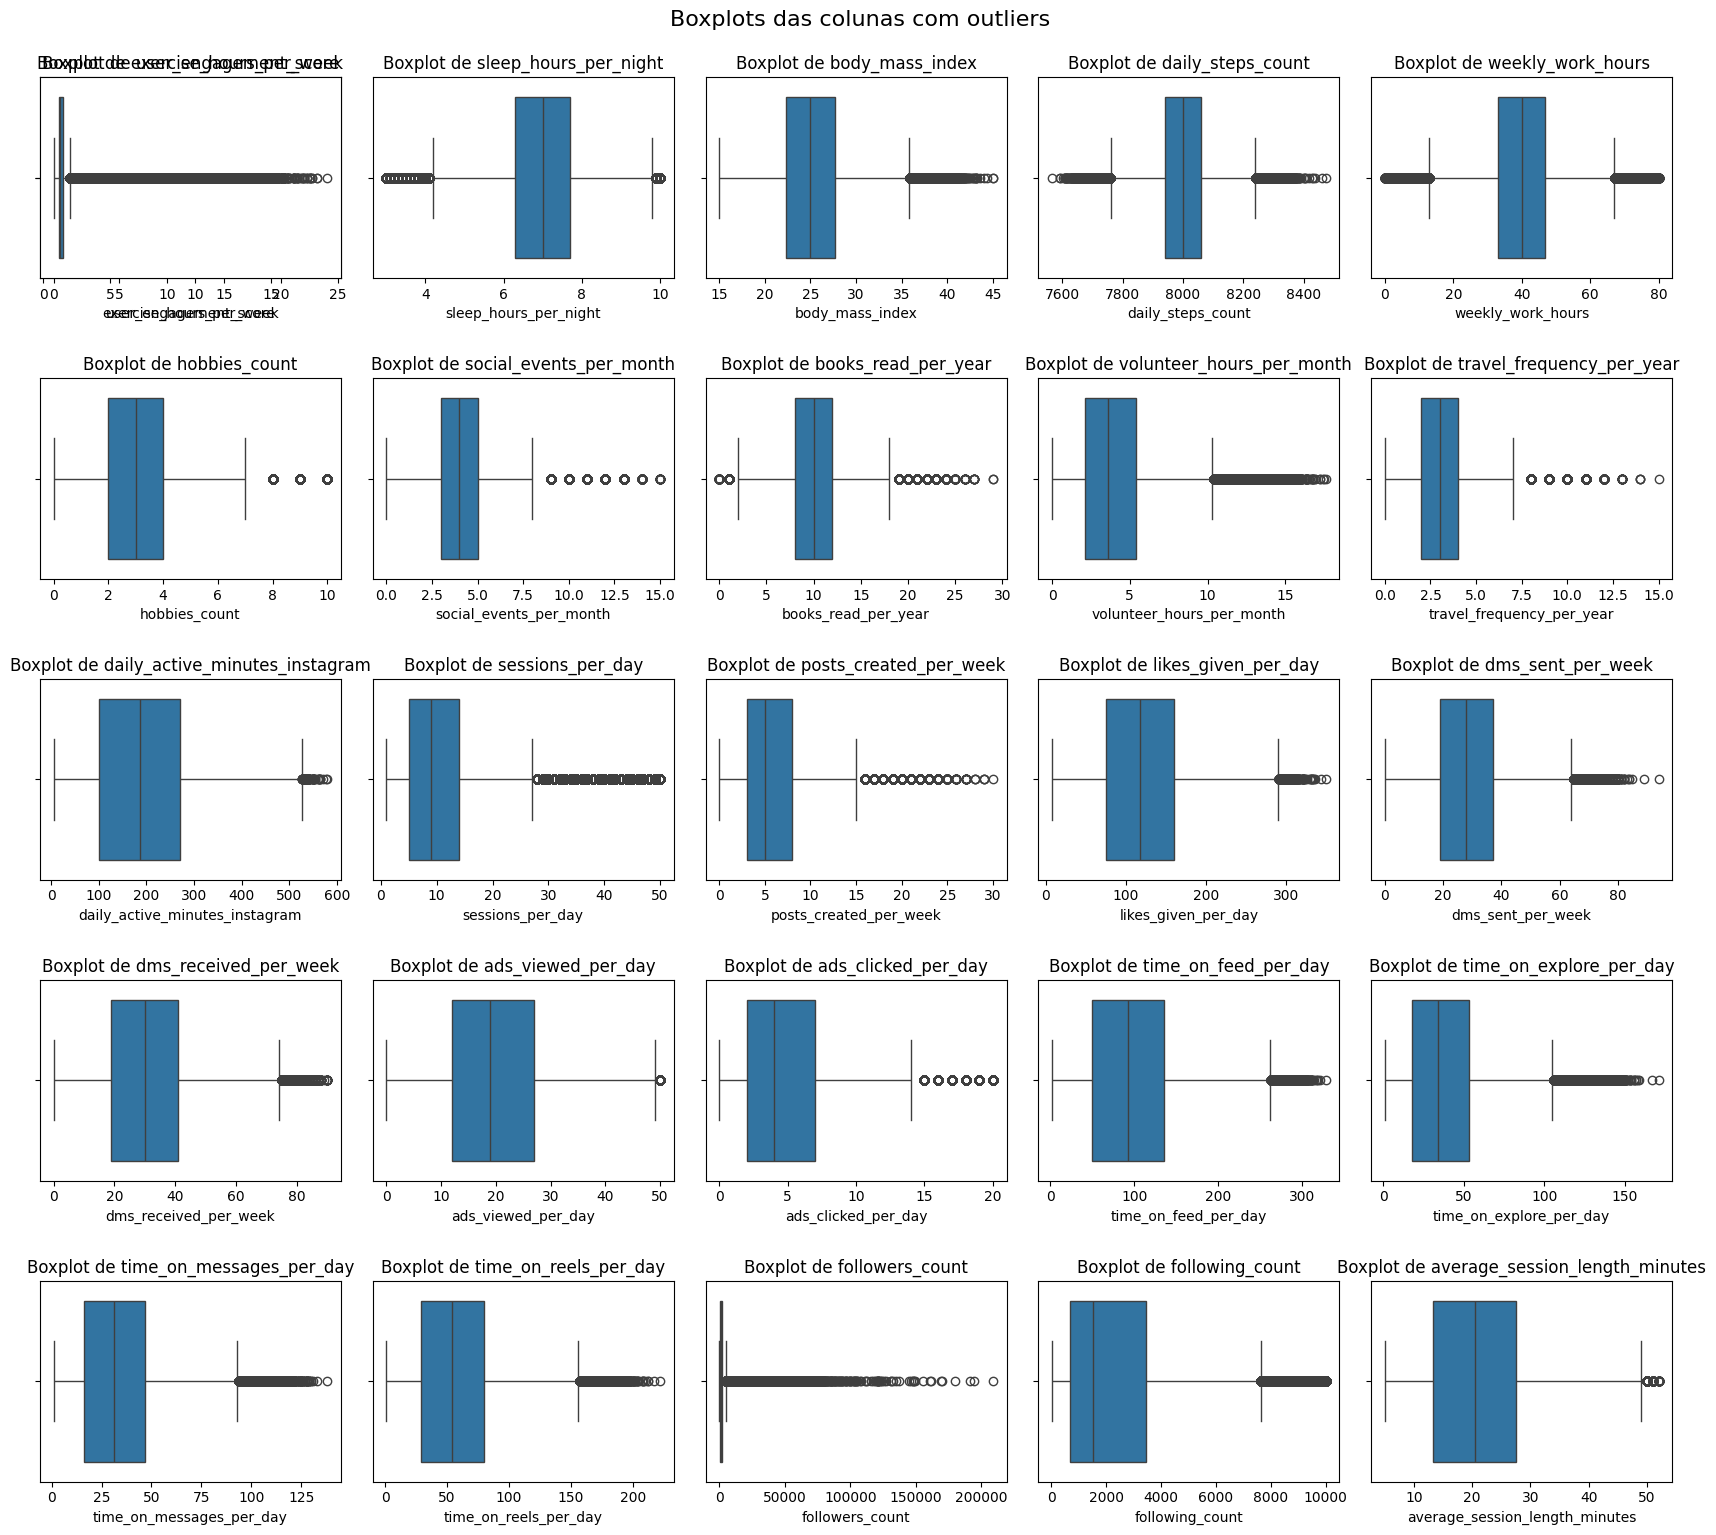

In [56]:
fig = plt.figure(figsize=(20,15))
grid = fig.add_gridspec(5,6)
eixo_X = 0
eixo_y = 0


for col in outliers_df.index:
    if outliers_df.loc[col, "contagem de outliers"] > 0:
        ax = fig.add_subplot(grid[eixo_y, eixo_X])
        sns.boxplot(x=df_raw[col], ax=ax)
        ax.set_title(f'Boxplot de {col}')
        eixo_X += 1
        if eixo_X >4 :
            eixo_X = 0
            eixo_y += 1
            if eixo_y >4:
                eixo_y = 0
plt.tight_layout()
fig.suptitle('Boxplots das colunas com outliers',fontsize=16, y=1.02,x=0.42 )
plt.subplots_adjust(hspace=0.5, )
        


# Gráficos plotados a partir dos dados brutos

## Distribuição de usuários entre os países da base de dados

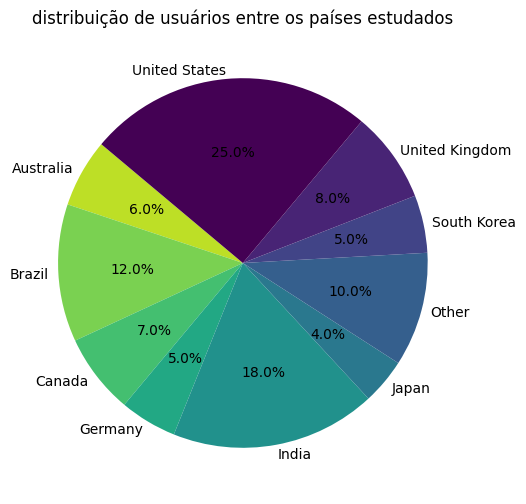

In [8]:
paises_count = df_raw.groupby('country').country.count()
plt.figure(figsize=(10,6))
plt.pie(paises_count, autopct='%1.1f%%', startangle=140,labels= paises_count.index,colors = plt.cm.viridis(np.linspace(0.9, 0, 10)), labeldistance=1.05)
plt.title('distribuição de usuários entre os países estudados')
plt.show()

## Gráfico de relação entre idade dos usuarios e exercícios físico 

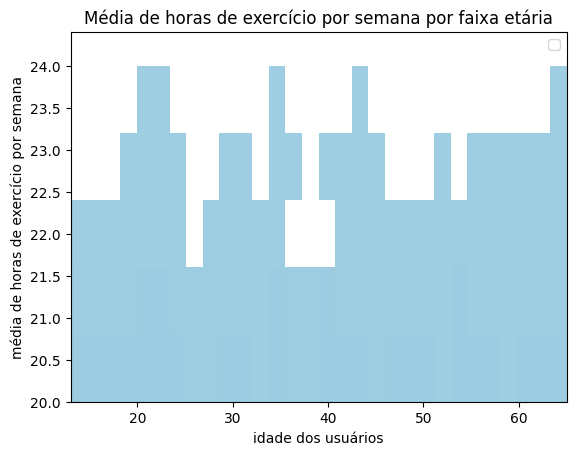

In [58]:
df_exer_hours = df_raw.sample(400000)
sns.histplot(x = 'age', y='exercise_hours_per_week', data=df_exer_hours, kde=True, bins=30, color='skyblue')
plt.ylim(20,24.4)
plt.xlim(13,65)
plt.xlabel("idade dos usuários") 
plt.ylabel("média de horas de exercício por semana")
plt.title("Média de horas de exercício por semana por faixa etária")
plt.legend(['Média de horas de exercício por semana'])
plt.show()

np.int64(65)

## Gráfico de sedentarismo em comparação ao total de usuários por faixa etária

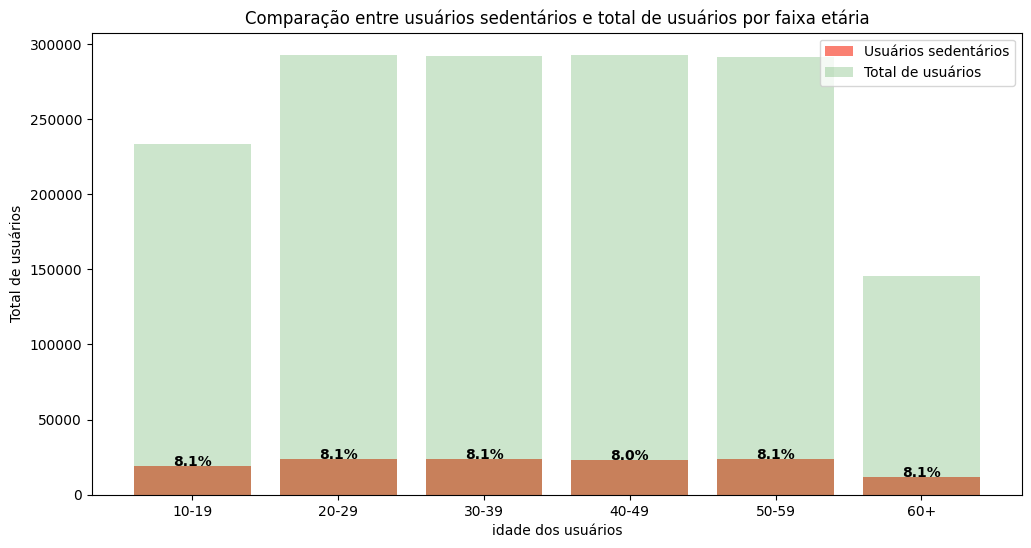

In [10]:
plt.figure(figsize=(12,6))
df_raw['seden'] = df_raw['exercise_hours_per_week'] <= 2
df_raw['seden_total'] = df_raw[df_raw['seden'] == True]['exercise_hours_per_week']
idd_seden = df_raw.groupby('age_group',observed=True)['seden_total'].count() 
per = (idd_seden / df_raw.groupby('age_group',observed=True)['exercise_hours_per_week'].count()) * 100
plt.bar(idd_seden.index, idd_seden.values, color='salmon')
idd_total = df_raw.groupby('age_group',observed=True)['exercise_hours_per_week'].count()
plt.bar(idd_total.index, idd_total.values, color='green', alpha=0.2)
for i, valor_percentual in enumerate(per):
    plt.text(i, idd_seden.values[i] + 1, f'{valor_percentual:.1f}%', 
             ha='center', fontsize=10, fontweight='bold')
plt.xlabel("idade dos usuários") 
plt.ylabel("Total de usuários")
plt.title("Comparação entre usuários sedentários e total de usuários por faixa etária")
plt.legend(['Usuários sedentários', 'Total de usuários'])
plt.show()

## RELAÇÃO DE PAÍSES QUE MAIS FUMAM

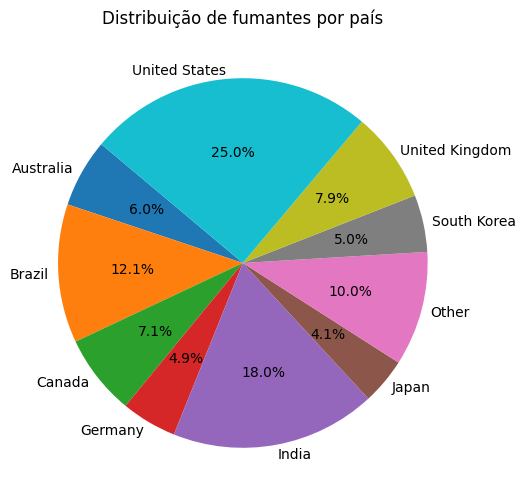

In [11]:
df_fumantes = df_raw[df_raw['smoking'] == 'Yes']

fumantes_paises = df_fumantes.groupby('country').country.count()

plt.figure(figsize=(10, 6))
plt.pie(
    fumantes_paises,
    autopct='%1.1f%%',
    startangle=140,
    labels=fumantes_paises.index,
    labeldistance=1.05
)
plt.title('Distribuição de fumantes por país')
plt.show()



## Fumantes por faixa etária

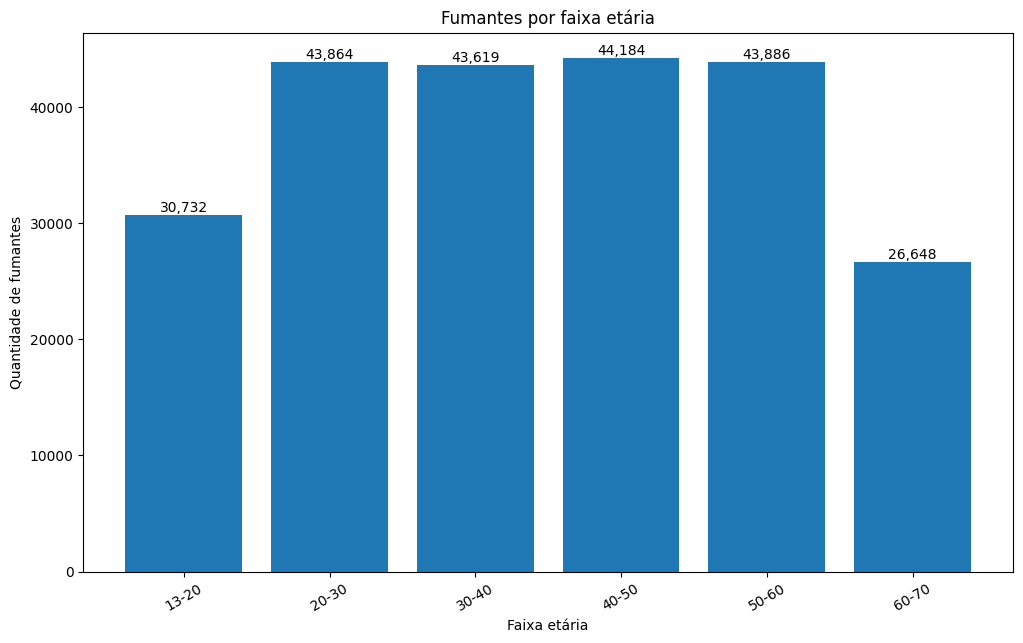

In [12]:
bins = [13, 20, 30, 40, 50, 60, 90]
labels = ['13-20', '20-30', '30-40', '40-50', '50-60', '60-70']

df_fumantes = df_raw.loc[df_raw['smoking'].str.lower() == 'yes'].copy()

df_fumantes['faixa_etaria'] = pd.cut(
    df_fumantes['age'],
    bins=bins,
    labels=labels,
    right=False
)

fumantes_idade = df_fumantes['faixa_etaria'].value_counts().sort_index()

plt.figure(figsize=(12, 7))
bars = plt.bar(fumantes_idade.index, fumantes_idade.values)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,}',
        ha='center',
        va='bottom'
    )

plt.title('Fumantes por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade de fumantes')
plt.xticks(rotation=30)
plt.show()



## Verificando possíveis falhas na coleta de dados de fumantes

In [13]:
qtd_menores = int((df_fumantes['age'] < 18).sum())
print("A quantidade de menores que fumam é de:",qtd_menores)


A quantidade de menores que fumam é de: 21992


Foram encontrados 21992 registros de fumantes menores de 18 anos na base de dados, indicando possível erro de coleta.

## RELAÇÃO ENTRE OS TOP 5 PAÍSES QUE MAIS FUMAM E A FAIXA ETÁRIA

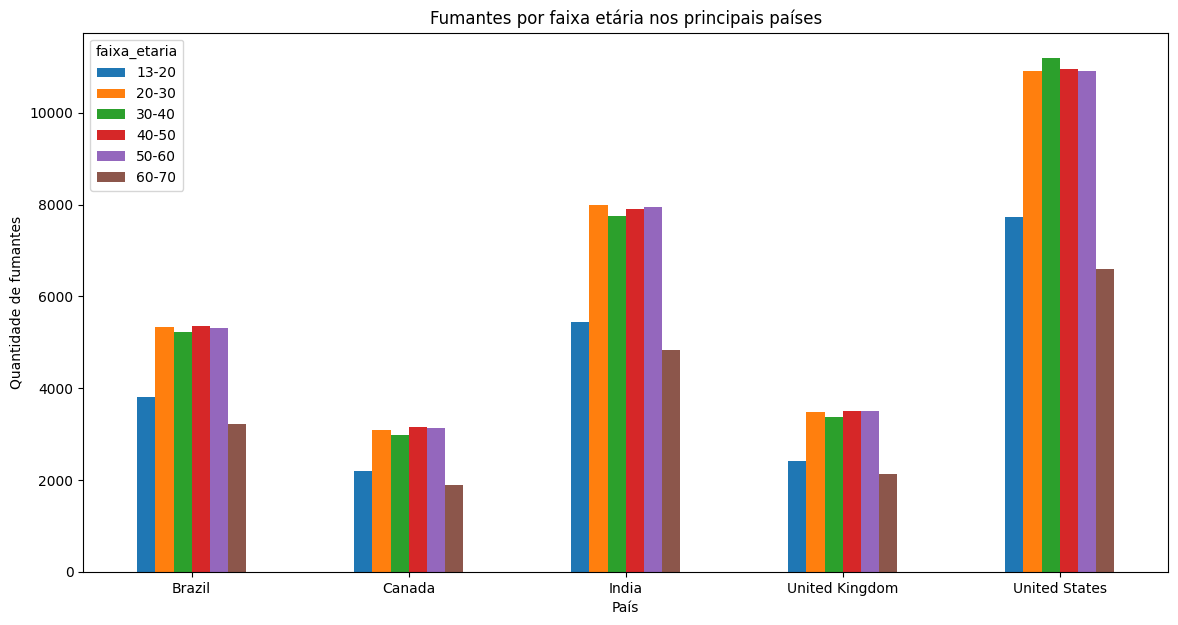

In [14]:
df_fumantes_sem_other = df_fumantes[df_fumantes['country'] != 'Other']

top_paises = (
    df_fumantes_sem_other['country']
    .value_counts()
    .head(5)
    .index
)

df_top = df_fumantes_sem_other[
    df_fumantes_sem_other['country'].isin(top_paises)
]

tabela_top = pd.crosstab(df_top['country'], df_top['faixa_etaria'])

tabela_top.plot(kind='bar', figsize=(14, 7))
plt.title('Fumantes por faixa etária nos principais países')
plt.xlabel('País')
plt.ylabel('Quantidade de fumantes')
plt.xticks(rotation=0)
plt.show()

## Países que mais clicam em anuncios 

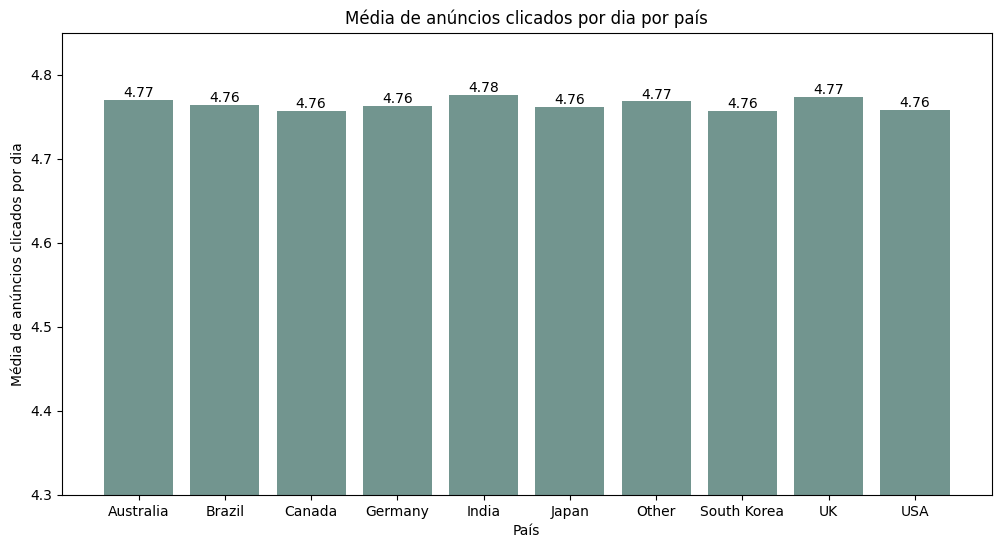

In [15]:
plt.figure(figsize=(12,6))
df_raw['country'] = df_raw['country'].replace({'United Kingdom': 'UK', 'United States': 'USA'})
anum_c = df_raw.groupby('country')['ads_clicked_per_day'].mean()
resul = plt.bar(anum_c.index, anum_c.values, color="#376860", alpha=0.7)
for num in resul:
    height = num.get_height()
    plt.text(
        num.get_x() + num.get_width() / 2,
        height,
        f'{height:1.2f}',
        ha='center',
        va='bottom'
    )
plt.ylim(4.3,4.85)
plt.xlabel("País") 
plt.ylabel("Média de anúncios clicados por dia")
plt.title("Média de anúncios clicados por dia por país")
plt.show()

## Faixa etária que mais clica em anuncios

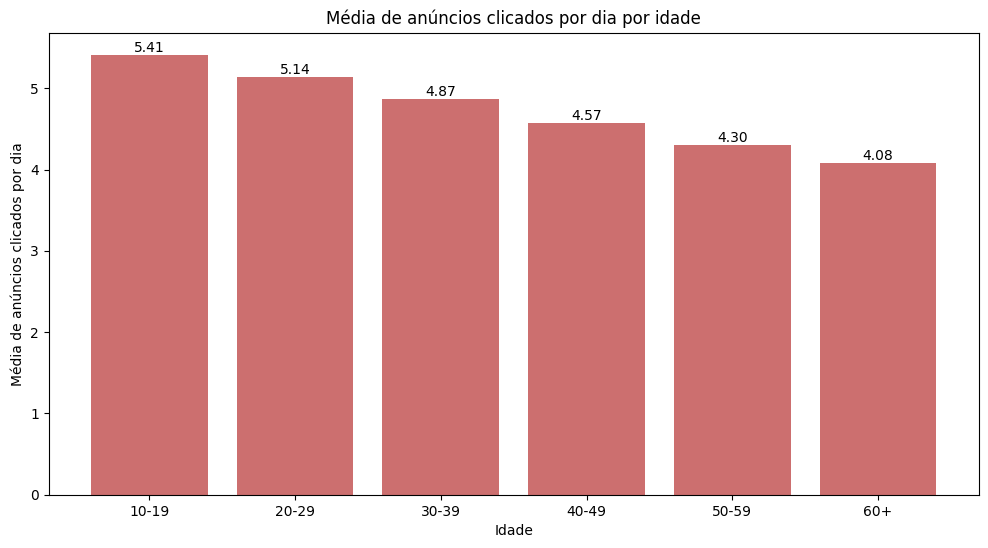

In [16]:
plt.figure(figsize=(12,6))
anum_id = df_raw.groupby('age_group', observed=True)['ads_clicked_per_day'].mean()
resul = plt.bar(anum_id.index, anum_id.values, color="#B73232", alpha=0.7)
for num in resul:
    height = num.get_height()
    plt.text(
        num.get_x() + num.get_width() / 2,
        height,
        f'{height:1.2f}',
        ha='center',
        va='bottom'
    )
plt.xlabel("Idade") 
plt.ylabel("Média de anúncios clicados por dia")
plt.title("Média de anúncios clicados por dia por idade")
plt.show()

## Classificação de risco dinâmico
Gráfico mostra uma matriz de correlação que tem como objetivo observar a relação de quantidade de exercício por semana com a idade e se a pessoa fuma ou não.<br>
Sendo de grande valia para gerar uma audiência qualificada para seguradoras ou planos de saúde, que podem aumentar o valor do plano, por exemplo.

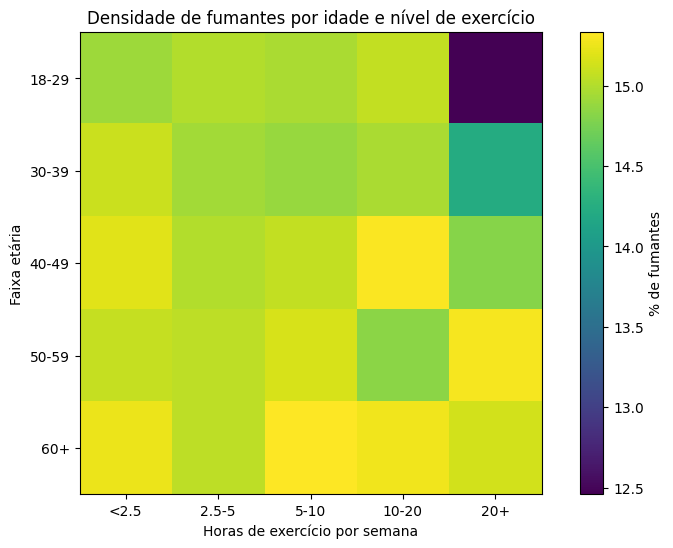

In [17]:
bins_ex = [0, 2.5, 5, 10, 20, 100]
labels_ex = ['<2.5', '2.5-5', '5-10', '10-20', '20+']

df_raw['faixa_exercicio'] = pd.cut(
    df_raw['exercise_hours_per_week'],
    bins=bins_ex,
    labels=labels_ex,
    right=False
)

bins_age = [18, 30, 40, 50, 60, 100]
labels_age = ['18-29', '30-39', '40-49', '50-59', '60+']

df_raw['faixa_idade'] = pd.cut(
    df_raw['age'],
    bins=bins_age,
    labels=labels_age,
    right=False
)

tabela = pd.crosstab(
    df_raw['faixa_idade'],
    df_raw['faixa_exercicio'],
    values=(df_raw['smoking'].str.lower() == 'yes'),
    aggfunc='mean'
) * 100

plt.figure(figsize=(10, 6))
plt.imshow(tabela)
plt.colorbar(label='% de fumantes')
plt.xticks(range(len(tabela.columns)), tabela.columns)
plt.yticks(range(len(tabela.index)), tabela.index)
plt.title('Densidade de fumantes por idade e nível de exercício')
plt.xlabel('Horas de exercício por semana')
plt.ylabel('Faixa etária')
plt.show()

## Gráfico de pessoas de ALTO RISCO
Ou seja, de grande valor para seguradoras e planos de saúde, pessoas que estão em risco elevado, ou seja, fumam e praticam menos de 5 horas de exercício por semana.<br>
Em laranja esses usuários, que estão em alto risco.

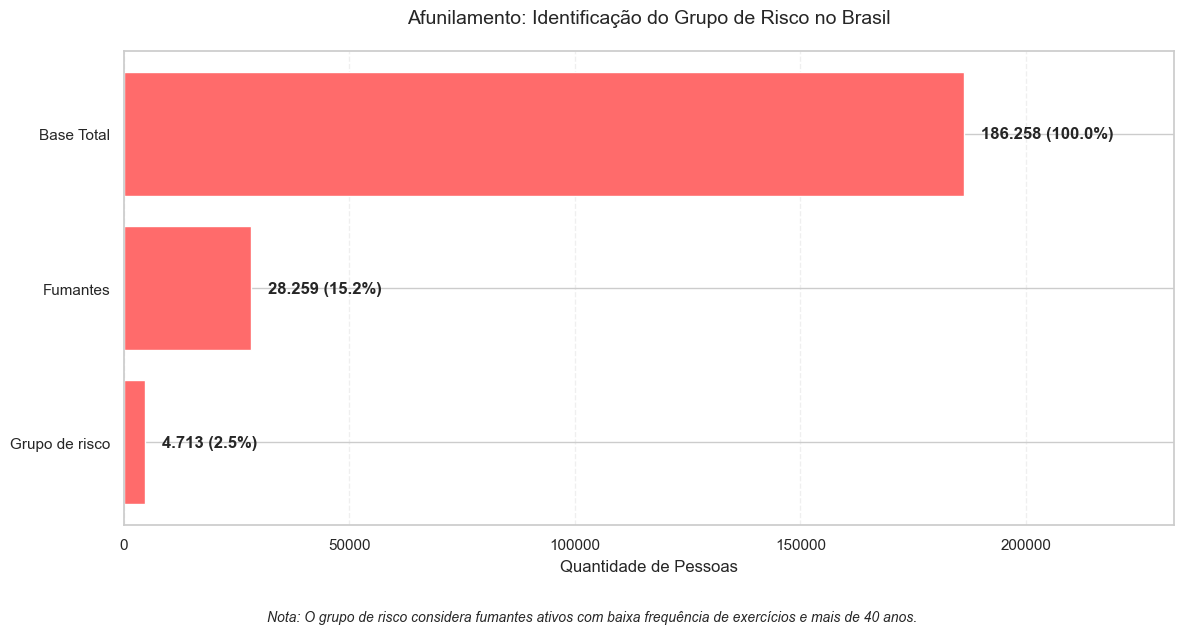

In [ ]:
df_br = df_raw[df_raw['country'] == 'Brazil'].copy()

total_base = len(df_br)

df_fumantes = df_br[df_br['smoking'].str.lower() == 'yes']
total_fumantes = len(df_fumantes)

df_grupo_risco = df_br[(df_br['age'] >= 40) & (df_br['smoking'].str.lower() == 'yes') & (df_br['exercise_hours_per_week'] < 5)]
total_grupo_risco = len(df_grupo_risco)

etapas = ["Base Total", "Fumantes", "Grupo de risco"]
valores = [total_base, total_fumantes, total_grupo_risco]

plt.figure(figsize=(12, 6))

bars = plt.barh(etapas[::-1], valores[::-1], color='#ff6b6b') 
for index, value in enumerate(valores[::-1]):
    percentual = (value / total_base) * 100
    plt.text(value + (max(valores) * 0.02), index, 
             f"{value:,} ({percentual:.1f}%)".replace(',', '.'), 
             va='center', fontweight='bold')

plt.xlim(0, max(valores) * 1.25) # o número tava encostando na barrinha final, aumenta o limite

plt.title('Afunilamento: Identificação do Grupo de Risco no Brasil', pad=20, fontsize=14)
plt.xlabel('Quantidade de Pessoas')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.figtext(0.5, -0.05, 
            "Nota: O grupo de risco considera fumantes ativos com baixa frequência de exercícios e mais de 40 anos.", 
            ha="center", fontsize=10, style='italic')
plt.tight_layout()
plt.show()





## Usuários qualificados que praticam esportes e não fumam no Brasil
Aqui seria um público qualificado no Brasil, para empresas interessadas em usuários com um lifestyle mais fitness, como academias e empresas que vendem materiais esportivos.<br>
A regra de negócio utilizada foi pessoas que não fumam e que praticam pelo menos 6 horas de exercício semanalmente.

## Analisando a correlação de horas trabalhadas com horas de exercicio fisico 

Text(33.51562500000001, 0.5, 'Horas de exercício por semana')

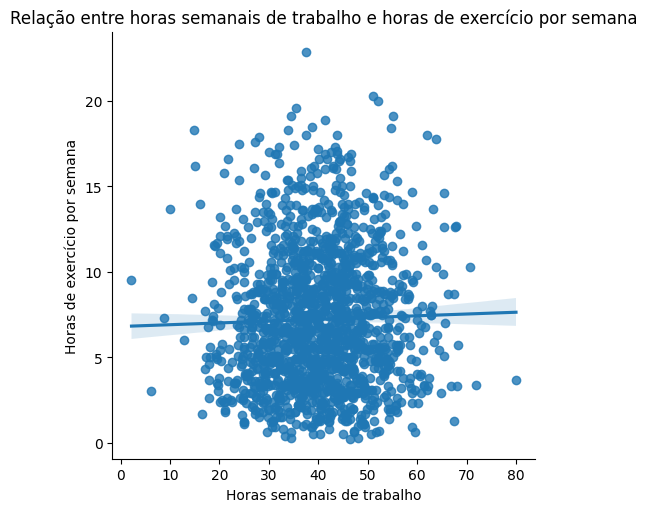

In [99]:
df_exer_hours = df_raw.sample(1534)
sns.lmplot(x='weekly_work_hours', y='exercise_hours_per_week', data=df_exer_hours,scatter=True)
plt.title('Relação entre horas semanais de trabalho e horas de exercício por semana')
plt.xlabel('Horas semanais de trabalho')
plt.ylabel('Horas de exercício por semana')

Analizando o grafico de regreção linear acima é possivel perceber que não relação relevante entre os dois dados pois sua linha de tendencia é quase horizonta demonstrado um coneficente de relação perto de 0, os pontos estão destribuido pelo grafico de forma a ter nenhuma tendencia. Com isso pode-se concluir pouca ou nenhuma relação entre horas de exercicio fisico e horas trabalhadas.

In [19]:
publico_esportivo = df_raw[
    (df_raw['exercise_hours_per_week'] >= 6) &
    (df_raw['smoking'].str.lower() == 'no') &
    (df_raw['country'].str.lower() == 'brazil')
].copy()

print(f'Tamanho do público esportivo: {len(publico_esportivo)} pessoas')

Tamanho do público esportivo: 78358 pessoas


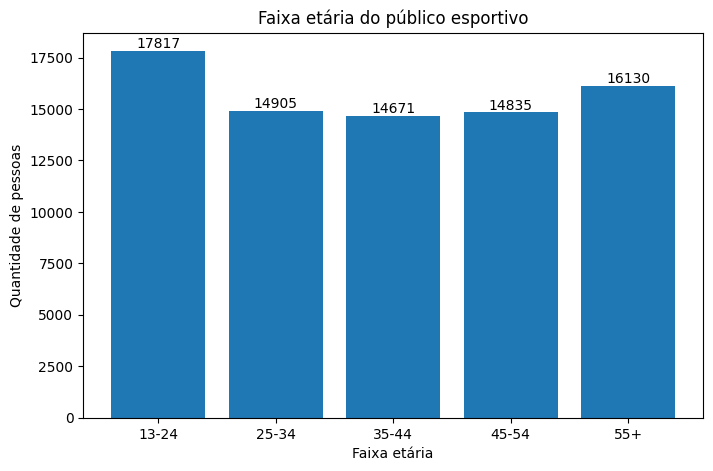

In [32]:
publico_esportivo['faixa_idade'] = pd.cut(
    publico_esportivo['age'],
    bins=[13, 25, 35, 45, 55, 100],
    labels=['13-24', '25-34', '35-44', '45-54', '55+'],
    right=False
)

contagem = publico_esportivo['faixa_idade'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(contagem.index, contagem.values)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height}',
        ha='center',
        va='bottom'
    )

plt.title('Faixa etária do público esportivo')
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade de pessoas')
plt.show()

## analizando a correlação entre faixa etaria e horas de exercicio fisico

Text(33.51562500000001, 0.5, 'Horas de exercício por semana')

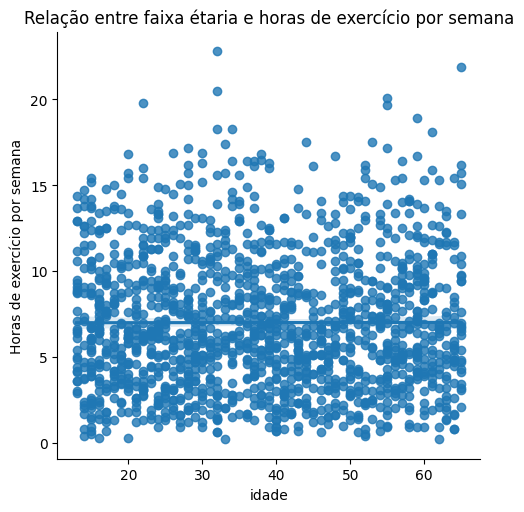

In [98]:
df_exer_age = df_raw.sample(1534)
sns.lmplot(x='age', y='exercise_hours_per_week', data=df_exer_age,scatter=True)
plt.title('Relação entre faixa étaria e horas de exercício por semana')
plt.xlabel('idade')
plt.ylabel('Horas de exercício por semana')

É possivel perceber tambem que há pouca ou nenhuma relação entre as duas colunas

## analisando o tipo de conteudo consumido por cada faixa étaria

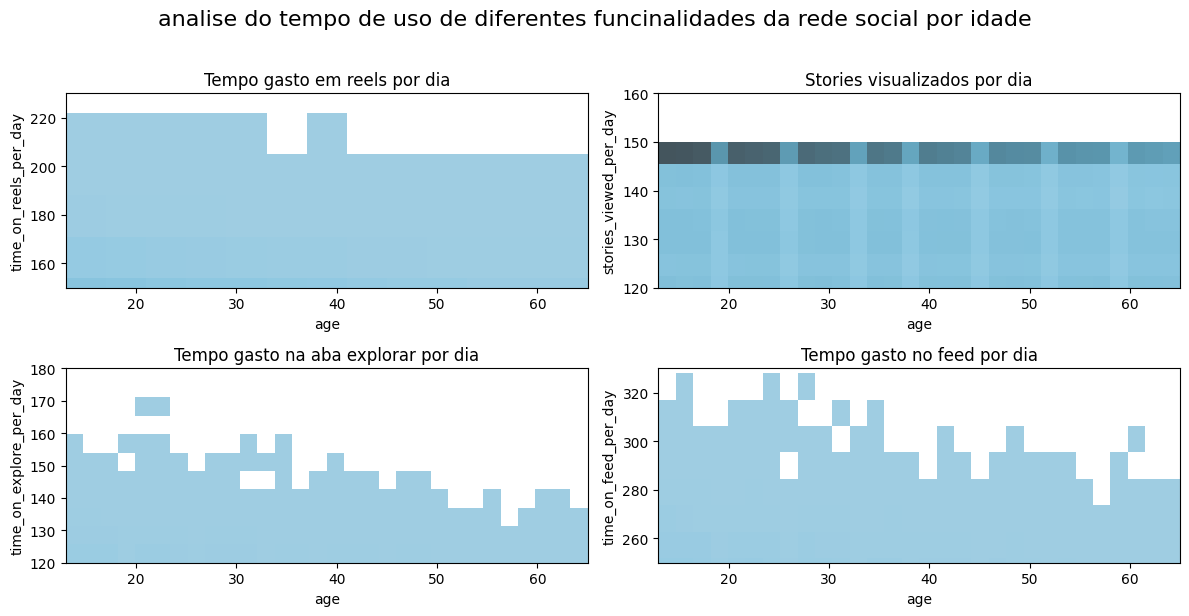

In [90]:
fig = plt.figure(figsize=(12,6))
grid = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])

graf1 = sns.histplot(x='age', y='time_on_reels_per_day', data=df_raw, kde=True, bins=13, color='skyblue',ax = ax1)
graf2 = sns.histplot(x='age', y='stories_viewed_per_day', data=df_raw, kde=True, bins=30, color='skyblue',ax = ax2)
graf3 = sns.histplot(x='age', y='time_on_explore_per_day', data=df_raw, kde=True, bins=30, color='skyblue',ax = ax3)
graf4 = sns.histplot(x='age', y='time_on_feed_per_day', data=df_raw, kde=True, bins=30, color='skyblue',ax = ax4)

graf1.set_ylim(150,230)
graf2.set_ylim(120,160)
graf3.set_ylim(120,180)
graf4.set_ylim(250,330)


graf1.set_xlim(13,65)
graf2.set_xlim(13,65)  
graf3.set_xlim(13,65)
graf4.set_xlim(13,65)

graf1.set_title('Tempo gasto em reels por dia')
graf2.set_title('Stories visualizados por dia')
graf3.set_title('Tempo gasto na aba explorar por dia')
graf4.set_title('Tempo gasto no feed por dia')

fig.suptitle('analise do tempo de uso de diferentes funcinalidades da rede social por idade',fontsize=16, y=1.02,x=0.5 )

plt.tight_layout()

É possivel perceber uma homegeniedade no histograma de stories visto, oque pode ser um bom caminho para anuncios, outra boa possibilidade de divulgação são a partir do reels na qual é percepitivel que os usuarios tem uma certa preferencia por essa funcionalidade. 